In [1]:
# 피쳐 엔지니어링 - 피쳐 선택(다중 공선성 제거), 피쳐 추출(PCA, BGM) > 설명 수정

In [2]:
# 한글, 음수 시각화 설정

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#시각화에서 음수를 표현하기 위한 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 

import warnings
warnings.filterwarnings('ignore')

# 분류 모델

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
Vac_sample_df = pd.read_csv('../data/Vac_sample_df.csv', index_col= 0)
# Vac_sample_df.info()

Vac_sample_df = Vac_sample_df.sample(frac= 1, random_state= 42).reset_index(drop= True)
Vac_sample_df[:10]

,X1WOS45106_PV,X1WOS45109_PV,DB.N2.SCREEN.FLOW.LEFT.1FI49011_PV,N2.TO.EA1313A.1FI33503A_PV,ROOF.HEATING.Zone.1.1JIC31101.PV,ROOF.HEATING.Zone.2.1JIC31102.PV,ROOF.HEATING.Zone.3.1JIC31103.PV,ROOF.HEATING.Zone.4.1JIC31104.PV,ATM.FLOW.SECT.9.N2.1FIC33415.PV,Gross.width,...,S_AB9_AB10_L_L,S_C2_C3_U_R,투입.LEFT.,ROLLDOWN.폐기.LEFT.,진공패드.폐기.LEFT.,폐기율...,bgm_feature_0,bgm_feature_1,bgm_feature_2,Vac_defect
0,1.0,1.0,0.261261,0.230769,1.000000,0.777778,0.923077,1.0,0.0,0.878201,...,0.831538,0.213221,0.699187,0.095310,0.187212,0.171860,1.000000e+00,8.721561e-26,1.188526e-128,1
1,1.0,1.0,0.720721,0.346154,1.000000,0.777778,0.923077,1.0,0.0,0.919031,...,0.898281,0.149570,0.707317,0.058269,0.028988,0.080317,1.237266e-26,1.000000e+00,5.615816e-125,0
2,1.0,1.0,0.000000,0.346154,0.777778,0.444444,1.000000,1.0,0.2,0.941176,...,0.514183,0.579245,0.788618,0.019803,0.187212,0.084806,8.001074e-109,0.000000e+00,1.000000e+00,1
3,1.0,1.0,0.909910,0.769231,1.000000,0.777778,0.923077,1.0,1.0,0.868512,...,0.735760,0.315249,0.869919,0.039221,0.057158,0.083772,1.000000e+00,1.101007e-185,0.000000e+00,0
4,1.0,1.0,0.765766,0.346154,0.777778,0.444444,0.846154,1.0,0.2,0.905190,...,0.640463,0.463560,0.691057,0.019803,0.000000,0.009703,1.000000e+00,0.000000e+00,4.817782e-62,0
5,0.5,0.0,0.000000,0.346154,0.833333,0.555556,1.000000,1.0,0.2,0.939100,...,0.553628,0.228749,0.186992,0.000000,0.137201,0.177999,4.271835e-235,0.000000e+00,1.000000e+00,1
6,1.0,1.0,0.000000,0.307692,0.500000,0.888889,0.230769,1.0,0.2,0.933564,...,0.503192,0.467216,0.479675,0.000000,0.000000,0.027738,0.000000e+00,0.000000e+00,1.000000e+00,0
7,1.0,1.0,0.720721,0.346154,0.888889,0.777778,0.923077,1.0,0.0,0.862976,...,0.822069,0.340349,0.650407,0.000000,0.057158,0.031198,9.758930e-66,1.000000e+00,1.000937e-176,0
8,1.0,1.0,0.900901,0.346154,1.000000,0.777778,0.923077,0.0,0.4,0.912111,...,0.812599,0.200361,0.821138,0.058269,0.162519,0.196195,0.000000e+00,1.000000e+00,1.616311e-213,1
9,1.0,1.0,0.801802,0.576923,1.000000,0.777778,0.923077,1.0,1.0,0.883737,...,0.787257,0.238426,0.325203,0.019803,0.084557,0.148051,1.000000e+00,4.377723e-107,0.000000e+00,1


In [5]:
X = Vac_sample_df.iloc[:, :-1]
y= Vac_sample_df['Vac_defect']

X.shape

(2208, 97)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
X_train.shape

(1766, 97)

In [7]:
# 분류 모델

# 로지스틱 회귀
# 트리 기반 모델 : RandomForest, CatBoost
# 딥러닝 : 간단한 MLP

# 평가 지표
# ROC-AUC, Precision-Recall Curve, F1 Score 등

# Recall: 실제 불량 데이터 중 모델이 불량으로 예측한 비율

# 선형 모델

## 1. 로지스틱 회귀

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

log_clf = LogisticRegression(random_state= 42, solver= 'lbfgs', multi_class= 'auto')

log_clf.fit(X_train, y_train)

log_preds = log_clf.predict(X_test)

print('로지스틱 회귀 재현율 :', recall_score(y_test, log_preds))

로지스틱 회귀 재현율 : 0.8564593301435407


# 트리 기반 모델

## 1. 랜덤포레스트

In [9]:
# Feature Importance
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators= 100, random_state= 42)
rf_clf.fit(X_train, y_train)

rf_importances = rf_clf.feature_importances_

rf_importance_df = pd.DataFrame({
  'feature' : X_train.columns,
  'importance' : rf_importances
})

# rf_importance_df.info()
rf_importance_df[:5]
rf_importance_df.sort_values(by= 'importance', ascending= False)[:10]['feature'].values

array(['진공패드.폐기.LEFT.', '폐기율...', 'DB.N2.SCREEN.FLOW.LEFT.1FI49011_PV',
       'D_AB2_R_UL', 'X.2.LEHR.O2.ANALYZER.1AI44113.PV',
       'TMP.TIN..BAY.1.LEFT.1TI30201.PV', 'DB.HEAT.BOTTOM.1.1JIC40308.PV',
       '투입.LEFT.', 'LOR.1.L.Hori', 'X.1.LEHR.SO2.ANALYZER.1AI44110.PV'],
      dtype=object)

- 하이퍼 파라미터 튜닝

In [28]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [30, 50, 100],
    'max_depth' : [10, 12, 14]
}


estimator = RandomForestClassifier(random_state= 42)
grid_cv = GridSearchCV(estimator= estimator, param_grid= params, cv= 3)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)

{'max_depth': 12, 'n_estimators': 50}


In [34]:
from sklearn.metrics import recall_score

best_rf_clf = grid_cv.best_estimator_
best_rf_clf.fit(X_train, y_train)

rf_preds = best_rf_clf.predict(X_test)

print('test 재현율 :', recall_score(y_test, rf_preds)) # 96.4%

test 재현율 : 0.9521531100478469


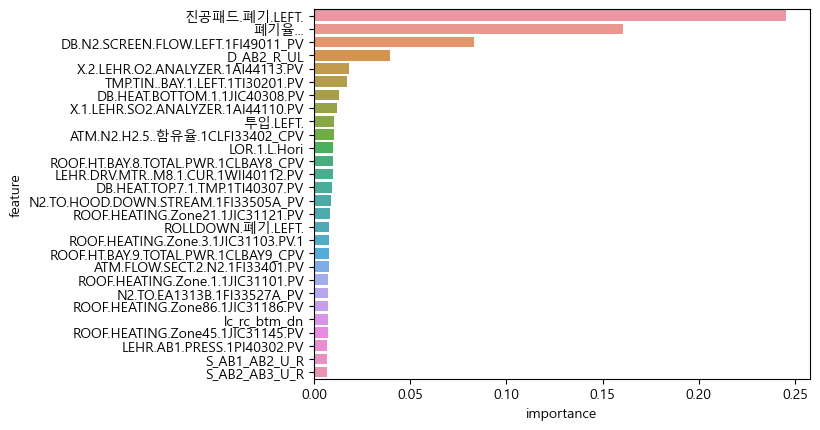

In [35]:
# 상위 28개의 피쳐 - PCA로 90%의 데이터 설명 가능
import seaborn as sns

feat_importance_df = pd.DataFrame({
  'feature' : X_train.columns,
  'importance' : best_rf_clf.feature_importances_
})

feat_importance_28 = feat_importance_df.sort_values(by= 'importance', ascending= False)[:28]
# print(feat_importance_28)

sns.barplot(x= feat_importance_28['importance'],
            y= feat_importance_28['feature'])
plt.show()

## 2. XG Boosting

In [13]:
import xgboost as xgb

train_set = xgb.DMatrix(data= X_train, label= y_train)
test_set = xgb.DMatrix(data= X_test, label= y_test)

# 하이퍼 파라미터 생성
# objective에 이진 분류인지 멀티 클래스 분류인지 설정
params = {'max_depth' : 5, 'eta' : 0.1, # eta는 학습률
          'objective' : 'binary:logistic', 'eval_matric' : 'logloss'}
# 예측 횟수
num_rounds = 700

# 일반 그라디언트 부스팅은 예측기의 개수를 설정하면 조기종료하지 않고고무조건 예측기 개수만큼 훈련
wlist= [(train_set, 'train'), (test_set, 'test')]
xgb_model = xgb.train(params= params, dtrain= train_set, num_boost_round= num_rounds, 
                      evals= wlist, early_stopping_rounds= 100)


# max_depth= 5, eta= 0.1 : [262]	train-logloss:0.00169	test-logloss:0.01852 ** 

# max_depth= 5, eta= 0.01 : [699]	train-logloss:0.00312	test-logloss:0.01905
# max_depth= 7, eta= 0.01 : [699]	train-logloss:0.00312	test-logloss:0.01905
# max_depth= 10, eta= 0.01 : [699]	train-logloss:0.00312	test-logloss:0.01905
# max_depth= 10, eta= 0.1 : [263]	train-logloss:0.00169	test-logloss:0.01852
# max_depth= 3, eta= 0.1 : [280]	train-logloss:0.00190	test-logloss:0.01944


[0]	train-logloss:0.60051	test-logloss:0.60266
[1]	train-logloss:0.52433	test-logloss:0.52797
[2]	train-logloss:0.46014	test-logloss:0.46350
[3]	train-logloss:0.40577	test-logloss:0.40889
[4]	train-logloss:0.35924	test-logloss:0.36214
[5]	train-logloss:0.31910	test-logloss:0.32179
[6]	train-logloss:0.28423	test-logloss:0.28674
[7]	train-logloss:0.25378	test-logloss:0.25613
[8]	train-logloss:0.22707	test-logloss:0.22926
[9]	train-logloss:0.20354	test-logloss:0.20559
[10]	train-logloss:0.18275	test-logloss:0.18467
[11]	train-logloss:0.16433	test-logloss:0.16613
[12]	train-logloss:0.14796	test-logloss:0.14965
[13]	train-logloss:0.13402	test-logloss:0.13562
[14]	train-logloss:0.12095	test-logloss:0.12245
[15]	train-logloss:0.10927	test-logloss:0.11069
[16]	train-logloss:0.09882	test-logloss:0.10016
[17]	train-logloss:0.08946	test-logloss:0.09072
[18]	train-logloss:0.08106	test-logloss:0.08226
[19]	train-logloss:0.07351	test-logloss:0.07465
[20]	train-logloss:0.06673	test-logloss:0.06781
[2

In [14]:
from sklearn.metrics import recall_score

xgb_preds= xgb_model.predict(test_set)
print(np.round(xgb_preds[:10], 3)) # 1로 판정할 확률을 리턴함

xgb_preds = [1 if pred > 0.5 else 0 for pred in xgb_preds]
print(xgb_preds[:10])

print('재현율 :', recall_score(y_test, xgb_preds))

[0.    0.999 0.    0.    0.    0.997 0.997 1.    0.999 0.998]
[0, 1, 0, 0, 0, 1, 1, 1, 1, 1]
재현율 : 1.0


In [15]:
# 다른 평가 지표
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

print('xgb 정확도 :', accuracy_score(y_test, xgb_preds))
print('xgb 정밀도 :', precision_score(y_test, xgb_preds))
print('xgb f1 score :', f1_score(y_test, xgb_preds))
print('xgb roc-auc-score :', roc_auc_score(y_test, xgb_preds))

xgb 정확도 : 1.0
xgb 정밀도 : 1.0
xgb f1 score : 1.0
xgb roc-auc-score : 1.0


In [36]:
# 1.0????
# 한 번 다른 샘플 데이터로도 확인

random_sample_df = pd.read_csv('../data/Vac_total_df.csv', index_col= 0)
random_sample_df.shape # (8143, 98)

X_sample = random_sample_df.iloc[: , :-1]
y_sample = random_sample_df['Vac_defect']

X_sample.shape
y_sample[:10]

X_sample_test, X_sample_valid, y_sample_test, y_sample_valid = train_test_split(X_sample, y_sample, test_size= 0.5, stratify= y_sample, random_state= 42)
X_sample_test.shape

test_sample_set = xgb.DMatrix(data= X_sample_test, label= y_sample_test)
valid_sample_set = xgb.DMatrix(data= X_sample_valid, label= y_sample_valid)

xgb_sample_preds = xgb_model.predict(test_sample_set)
xgb_sample_preds = [1 if x > 0.5 else 0 for x in xgb_sample_preds]

xgb_sample_preds_2 = xgb_model.predict(valid_sample_set)
xgb_sample_preds_2 = [1 if x > 0.5 else 0 for x in xgb_sample_preds_2]

print('재현율 :', recall_score(y_sample_test, xgb_sample_preds))
print('재현율 :', recall_score(y_sample_valid, xgb_sample_preds_2))

## 
print('재현율 :', recall_score(y_sample_test, xgb_sample_preds_2[:4071])) # 잘 안나오는게 맞는건데 0.1472.. 그럼 모델은 잘 되는건가? 
print('xgb 정확도 :', accuracy_score(y_sample_test, xgb_sample_preds))



재현율 : 1.0
재현율 : 1.0
재현율 : 0.14855072463768115
xgb 정확도 : 1.0


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

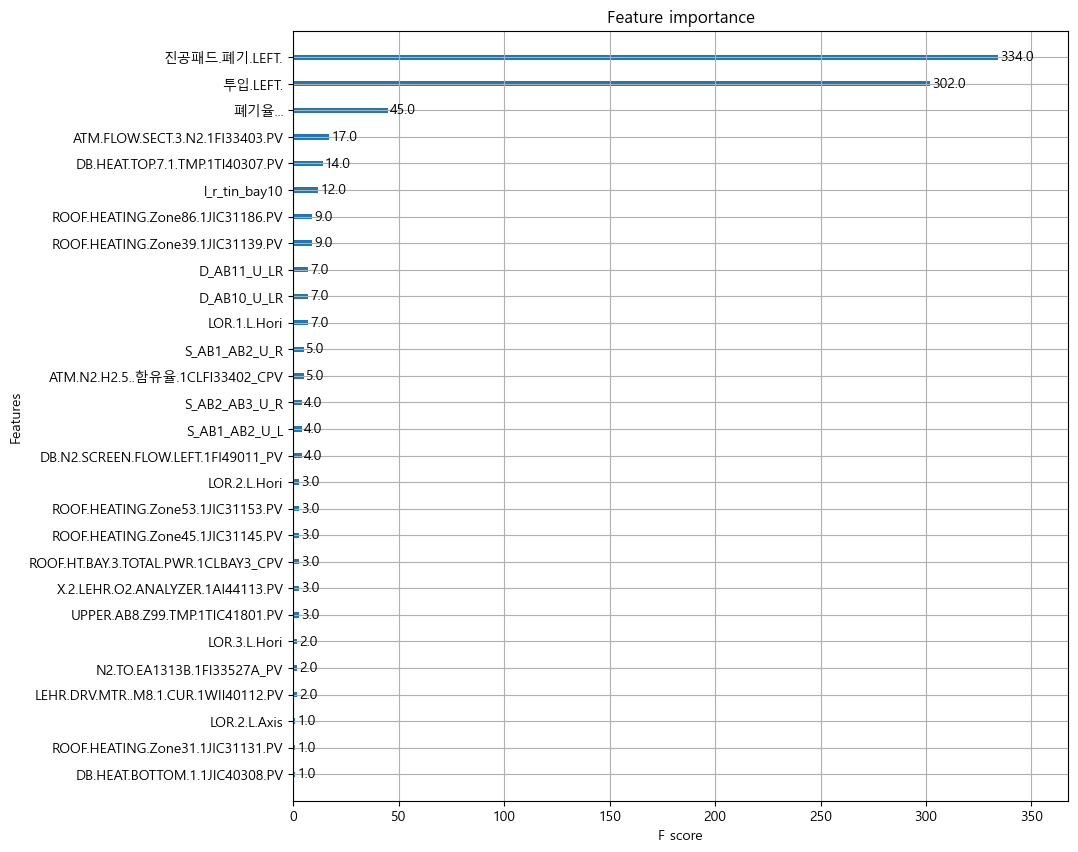

In [37]:
# 피쳐 중요도 시각화
import matplotlib.pyplot as plt
from xgboost import plot_importance

fig, ax = plt.subplots(figsize= (10, 10))

plot_importance(booster= xgb_model, ax= ax, max_num_features= 28)

## 3. MLP

In [18]:
import tensorflow as tf
from tensorflow import keras

In [38]:
X_train_MLP= X_train.values.reshape(-1, 97)
X_test_MLP= X_test.values.reshape(-1, 97)

In [39]:
y_train_MLP = keras.utils.to_categorical(y_train, num_classes= 2)
y_test_MLP = keras.utils.to_categorical(y_test, num_classes= 2)

In [40]:
y_test_MLP[:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [43]:
# 딥러닝 모델은 기본적으로 블랙박스 - shap를 활용하여 feature importance 파악
MLP_model = keras.models.Sequential([
  keras.layers.Flatten(input_shape= (97, )),
  keras.layers.Dense(units= 64, activation= 'relu'),
  keras.layers.Dense(units= 32, activation= 'relu'),
  keras.layers.Dense(units= 2, activation= 'sigmoid')
])

MLP_model.compile(optimizer= keras.optimizers.Adam(learning_rate= 0.05),
                  loss= 'binary_crossentropy',
                  metrics= [keras.metrics.Recall()]) # recall은 위의 변수와 겹쳐서 문제발생했음

MLP_model.summary()

MLP_history = MLP_model.fit(X_train_MLP, y_train_MLP, epochs= 30, batch_size= 32, validation_split= 0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 97)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                6272      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 8418 (32.88 KB)
Trainable params: 8418 (32.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
45/45 [==============================] - 2s 15ms/step - loss: 0.7458 - recall_3: 0.5538 - val_loss: 0.7146 - val_recall_3: 0.4802
Epoch 2/30


In [44]:
MLP_model.evaluate(X_test_MLP, y_test_MLP)

14/14 [==============================] - 0s 3ms/step - loss: 0.0665 - recall_3: 0.9751


[0.06651386618614197, 0.9751130938529968]

In [24]:
# pip install shap

PermutationExplainer explainer: 443it [00:56,  6.48it/s]                         


TypeError: only integer scalar arrays can be converted to a scalar index

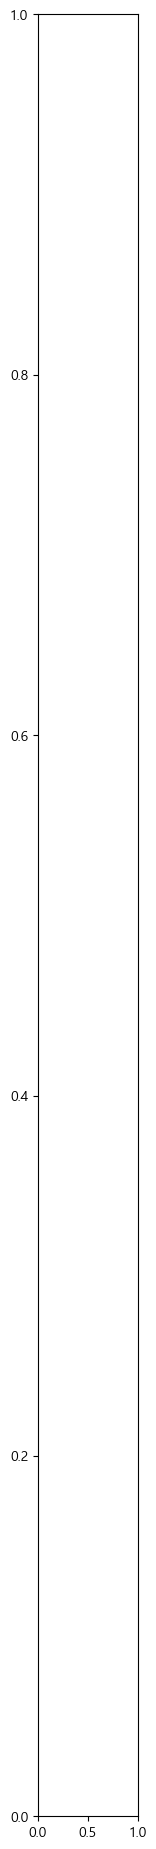

In [46]:
import shap
import pandas as pd
import numpy as np

# 1. SHAP Explainer 생성
explainer = shap.Explainer(MLP_model, X_train_MLP)

# 2. SHAP Values 계산
shap_values = explainer(X_test_MLP)

# 3. Feature Names 설정
if isinstance(X_test_MLP, pd.DataFrame):
    # Pandas DataFrame인 경우
    feature_names = X_test_MLP.columns
    feature_names= list(feature_names)
else:
    # NumPy ndarray인 경우
    feature_names = [f"Feature {i}" for i in range(X_test_MLP.shape[1])]

# 4. SHAP Summary Plot 출력
shap.summary_plot(
    shap_values,
    X_test_MLP,
    feature_names=feature_names,  # 반드시 리스트 형태로 변환
    plot_size=(12, 8),
    max_display=28  # 표시할 최대 피처 개수 설정
)